# Prediction of the Wine Quality using Support Vector Machine Algorithm

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline 

from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
len(df)

178

In [7]:
len(df.target)

178

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
df[df.target==0].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
df['wine_type'] = df.target.apply(lambda x:wine.target_names[x])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


In [11]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [12]:
df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,wine_type
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2,class_2
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2,class_2
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2,class_2
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0,2,class_2
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2,class_2


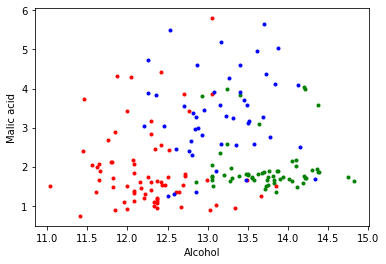

In [13]:
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.scatter(df0['alcohol'],df0['malic_acid'], color = 'green', marker='.')
plt.scatter(df1['alcohol'],df1['malic_acid'], color = 'red', marker='.')
plt.scatter(df2['alcohol'],df2['malic_acid'], color = 'blue', marker='.')

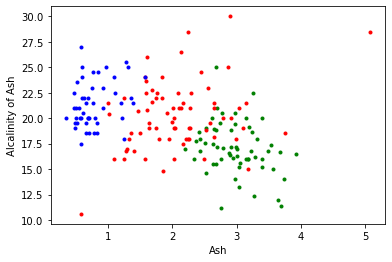

In [14]:
plt.xlabel('Ash')
plt.ylabel('Alcalinity of Ash')
plt.scatter(df0['flavanoids'],df0['alcalinity_of_ash'], color = 'green', marker='.')
plt.scatter(df1['flavanoids'],df1['alcalinity_of_ash'], color = 'red', marker='.')
plt.scatter(df2['flavanoids'],df2['alcalinity_of_ash'], color = 'blue', marker='.')

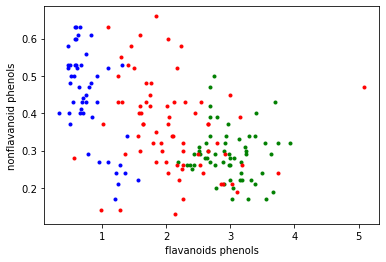

In [15]:
plt.xlabel('flavanoids phenols')
plt.ylabel('nonflavanoid phenols')
plt.scatter(df0['flavanoids'],df0['nonflavanoid_phenols'], color = 'green', marker='.')
plt.scatter(df1['flavanoids'],df1['nonflavanoid_phenols'], color = 'red', marker='.')
plt.scatter(df2['flavanoids'],df2['nonflavanoid_phenols'], color = 'blue', marker='.')

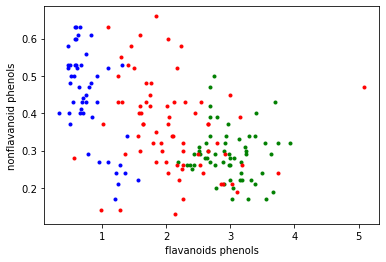

In [16]:
plt.xlabel('flavanoids phenols')
plt.ylabel('nonflavanoid phenols')
plt.scatter(df0['flavanoids'],df0['nonflavanoid_phenols'], color = 'green', marker='.')
plt.scatter(df1['flavanoids'],df1['nonflavanoid_phenols'], color = 'red', marker='.')
plt.scatter(df2['flavanoids'],df2['nonflavanoid_phenols'], color = 'blue', marker='.')

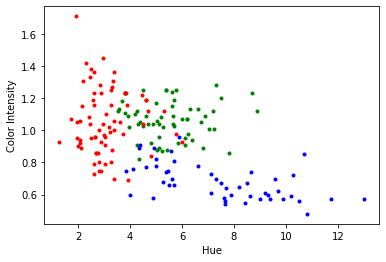

In [17]:
plt.xlabel('Hue')
plt.ylabel('Color Intensity')
plt.scatter(df0['color_intensity'],df0['hue'], color = 'green', marker='.')
plt.scatter(df1['color_intensity'],df1['hue'], color = 'red', marker='.')
plt.scatter(df2['color_intensity'],df2['hue'], color = 'blue', marker='.')

In [18]:
X = df.drop(['target', 'wine_type'], axis='columns')
y = df.target

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=.2)

In [21]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [22]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
model.score(X_test, y_test)

0.9722222222222222

In [24]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

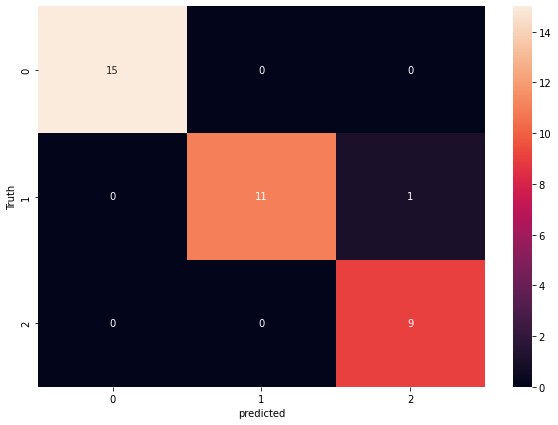

In [25]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')